데이터프레임 연산

데이터프레임, 데이터프레임
- 같은 행 같은 열 위치에 있는 원소끼리 계산
- 데이터프레임 객체1 + 연산자(+, -, *, /) + 데이터프레임 객체2

In [2]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

# df 객체 생성
# titanic 데이터셋에서 전체 행, 특정 열(age, fare) 가져오기
df = titanic.loc[:, ['age', 'fare']]

# 데이터프레임에 숫자 10 더하기(addition)
addition = df + 10

In [3]:
# addition 데이터프레임에서 df 데이터프레임 빼고 출력(subtraction)
subtraction = addition - df
print(subtraction)

      age  fare
0    10.0  10.0
1    10.0  10.0
2    10.0  10.0
3    10.0  10.0
4    10.0  10.0
..    ...   ...
886  10.0  10.0
887  10.0  10.0
888   NaN  10.0
889  10.0  10.0
890  10.0  10.0

[891 rows x 2 columns]


NaN 값 제거하기 방법1

In [6]:
subtraction.ffill(inplace=True)
print(subtraction)

      age  fare
0    10.0  10.0
1    10.0  10.0
2    10.0  10.0
3    10.0  10.0
4    10.0  10.0
..    ...   ...
886  10.0  10.0
887  10.0  10.0
888  10.0  10.0
889  10.0  10.0
890  10.0  10.0

[891 rows x 2 columns]


NaN 값 제거하기 방법2

In [7]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

# df 객체 생성
# titanic 데이터셋에서 전체 행, 특정 열(age, fare) 가져오기
df = titanic.loc[:, ['age', 'fare']]

# 데이터프레임 객체.fillna(0, inplace = True)
df.fillna(0, inplace = True)

# 데이터프레임에 숫자 10 더하기(addition)
addition = df + 10

addition 출력

In [8]:
print(addition)

      age     fare
0    32.0  17.2500
1    48.0  81.2833
2    36.0  17.9250
3    45.0  63.1000
4    45.0  18.0500
..    ...      ...
886  37.0  23.0000
887  29.0  40.0000
888  10.0  33.4500
889  36.0  40.0000
890  42.0  17.7500

[891 rows x 2 columns]


데이터프레임 구조
- auto-mpg.csv
- mpg(연비), cylinder(실린더 수), displacement(배기량), horsepower(출력), weigth(무게), acceleration(가속 능력), model_year(출시 연도), origin(제조국), model_name(모델 명)

auto-mpg.csv 파일을 불러옴(헤더 적용 X)<br>
열 이름 지정(mpg, cylinder, displacement, horsepower, weigth, acceleration, model year, origin, name)

In [20]:
import pandas as pd

df = pd.read_csv('./auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinder', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

In [10]:
print(df)

      mpg  cylinder  displacement horsepower  weigth  acceleration  \
0    18.0         8         307.0        130    3504          12.0   
1    15.0         8         350.0        165    3693          11.5   
2    18.0         8         318.0        150    3436          11.0   
3    16.0         8         304.0        150    3433          12.0   
4    17.0         8         302.0        140    3449          10.5   
..    ...       ...           ...        ...     ...           ...   
393  27.0         4         140.0         86    2790          15.6   
394  44.0         4          97.0         52    2130          24.6   
395  32.0         4         135.0         84    2295          11.6   
396  28.0         4         120.0         79    2625          18.6   
397  31.0         4         119.0         82    2720          19.4   

     model year  origin                       name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  


데이터 요약 정보 확인

데이터프레임의 크기
- shape 속성 확인
- 데이터프레임 객체.shape

df 데이터프레임의 크기를 출력

In [11]:
print(df.shape)

(398, 9)


데이터프레임의 기본 정보
- info 함수 사용
- 데이터프레임 객체.info()

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinder      398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weigth        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


- 데이터 유형, 행 인덱스 구성, 열 이름 종류와 개수, 열의 자료형과 개수, 메모리 사용량

특정 정보 확인

각 열의 자료형 확인
- dtypes 속성
- 데이터프레임 객체.dtypes

In [13]:
print(df.dtypes)

mpg             float64
cylinder          int64
displacement    float64
horsepower       object
weigth            int64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object


특정 열의 자료형 확인
- 데이터프레임 객체.열 이름.dtypes

In [14]:
print(df.mpg.dtypes)

float64


데이터프레임의 기술 통계 정보 요약
- describe 함수 사용
 - 숫자 데이터를 사용하는 열에 대한 주요 기술 통계 정보(평균, 표준편차, 최대값, 중간값 등)을 요약하여 출력
- 데이터프레임 객체.describe()
 - decribe 함수 안에 값을 include='all' 옵션을 넣으면 추가 정보 확인 가능

In [15]:
print(df.describe())

              mpg    cylinder  displacement       weigth  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [16]:
print(df.describe(include='all')) # IQR = 11.5, IQR * 1.5 = 17.25, Q1 - 1.5 * IQR = -0.25
                                  # Q3 + 1.5 * IQR = 29 + 17.25 = 46.25

               mpg    cylinder  displacement horsepower       weigth  \
count   398.000000  398.000000    398.000000        398   398.000000   
unique         NaN         NaN           NaN         94          NaN   
top            NaN         NaN           NaN        150          NaN   
freq           NaN         NaN           NaN         22          NaN   
mean     23.514573    5.454774    193.425879        NaN  2970.424623   
std       7.815984    1.701004    104.269838        NaN   846.841774   
min       9.000000    3.000000     68.000000        NaN  1613.000000   
25%      17.500000    4.000000    104.250000        NaN  2223.750000   
50%      23.000000    4.000000    148.500000        NaN  2803.500000   
75%      29.000000    8.000000    262.000000        NaN  3608.000000   
max      46.600000    8.000000    455.000000        NaN  5140.000000   

        acceleration  model year      origin        name  
count     398.000000  398.000000  398.000000         398  
unique           

통계 함수 적용

평균값
- mean 함수 사용
- 데이터프레임 객체.mean()
- 데이터프레임 객체[열이름].mean()

In [17]:
print(df.mean())

mpg               23.514573
cylinder           5.454774
displacement     193.425879
weigth          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64


C:\Users\student\AppData\Local\Temp/ipykernel_15256/2807316344.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())


In [18]:
print(df['mpg'].mean())

23.514572864321615


In [22]:
print(df[['mpg', 'weight']].mean())

mpg         23.514573
weight    2970.424623
dtype: float64


중간값
- 사분위 값 중 50%에 해당하는 값
- median 함수 사용
- 데이터프레임 객체.median()
- 데이터프레임 객체[열 이름].median()

전체 중간값 출력

In [23]:
print(df.median())

mpg               23.0
cylinder           4.0
displacement     148.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64


C:\Users\student\AppData\Local\Temp/ipykernel_15256/4259369830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.median())


mpg 중간값 출력

In [24]:
print(df['mpg'].median())

23.0


최대값
- max 함수 사용
- 데이터프레임 객체.max()
- 데이터프레임 객체[열 이름].max()

전체 최대값 출력

In [26]:
print(df.max())

mpg                         46.6
cylinder                       8
displacement               455.0
horsepower                     ?
weight                      5140
acceleration                24.8
model year                    82
origin                         3
name            vw rabbit custom
dtype: object


mpg 최대값 출력

In [27]:
print(df['mpg'].max())

46.6


최소값
- min 함수 사용
- 데이터프레임 객체.min()
- 데이터프레임 객체[열 이름].min()

전체 최소값 출력

In [29]:
print(df.min())

mpg                                 9.0
cylinder                              3
displacement                       68.0
horsepower                          100
weight                             1613
acceleration                        8.0
model year                           70
origin                                1
name            amc ambassador brougham
dtype: object


mpg 최소값 출력

In [30]:
print(df['mpg'].min())

9.0


표준편차
- std 함수 사용
- 데이터프레임 객체.std()
- 데이터프레임 객체[열 이름].std()

전체 표준편차 출력

In [32]:
print(df.std())

mpg               7.815984
cylinder          1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64


C:\Users\student\AppData\Local\Temp/ipykernel_15256/2597523637.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())


mpg 표준편차 출력

In [33]:
print(df['mpg'].std())

7.815984312565782


상관계수
- corr 함수 사용
 - 두 열 간의 상관계수를 구하는 함수
- 데이터프레임 객체.corr()
- 데이터프레임 객체[[열이름, 열이름]].corr()

전체 상관계수 출력

In [34]:
print(df.corr())

                   mpg  cylinder  displacement    weight  acceleration  \
mpg           1.000000 -0.775396     -0.804203 -0.831741      0.420289   
cylinder     -0.775396  1.000000      0.950721  0.896017     -0.505419   
displacement -0.804203  0.950721      1.000000  0.932824     -0.543684   
weight       -0.831741  0.896017      0.932824  1.000000     -0.417457   
acceleration  0.420289 -0.505419     -0.543684 -0.417457      1.000000   
model year    0.579267 -0.348746     -0.370164 -0.306564      0.288137   
origin        0.563450 -0.562543     -0.609409 -0.581024      0.205873   

              model year    origin  
mpg             0.579267  0.563450  
cylinder       -0.348746 -0.562543  
displacement   -0.370164 -0.609409  
weight         -0.306564 -0.581024  
acceleration    0.288137  0.205873  
model year      1.000000  0.180662  
origin          0.180662  1.000000  


mpg, weight 상관계수 출력

In [35]:
print(df[['mpg', 'weight']].corr())

             mpg    weight
mpg     1.000000 -0.831741
weight -0.831741  1.000000


판다스 내장 그래프 도구 활용
- 한 눈에 보기 위해(쉽게 알아보기 위해, 직관적으로 보기 위해)
 - 유의미한 정보 획득 가능
- plot() 함수 지원
 - line : 선 그래프
 - bar : 수직 막대 그래프
 - bash : 수평 막대 그래프
 - his : 히스토그램
 - box : 박스 플롯
 - kde : 커널 밀도 그래프
 - area : 면적 그래프
 - pie : 파이 그래프
 - scatter : 산점도
 - hexbin : 고밀도 산점도

선 그래프
- plot 함수 사용, 옵션 추가 X
- 데이터프레임 객체.plot()

pandas 모듈 가져오기<br>
df 객체에 남북한발전전력량.xlsx 파일 가져오기<br>
df_ns 객체에 발전량 합계만 추출(0번 행, 5번행, 2번 열부터)<br>
각각 South, North로 행 인덱스 지정

In [36]:
import pandas as pd

df = pd.read_excel('./남북한발전전력량.xlsx')

df_ns = df.iloc[[0, 5], 2:]

df_ns.index = ['South', 'North']

df_ns.columns = df_ns.columns.map(int)

In [37]:
print(df_ns)

       1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
South  1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
North   277   263   247   221   231   230   213   193   170   186  ...   236   

       2008  2009  2010  2011  2012  2013  2014  2015  2016  
South  4224  4336  4747  4969  5096  5171  5220  5281  5404  
North   255   235   237   211   215   221   216   190   239  

[2 rows x 27 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


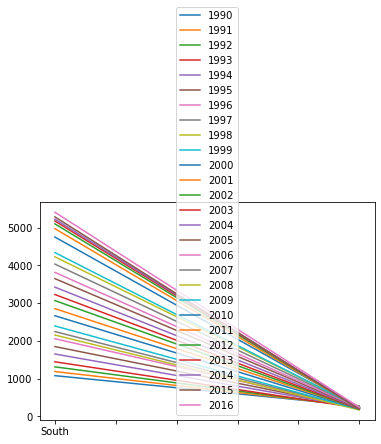

In [38]:
print(df_ns.plot())

tdf_ns 객체 생성 후 시각화
- df_ns 뒤집어주기

     South North
1990  1077   277
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
AxesSubplot(0.125,0.125;0.775x0.755)


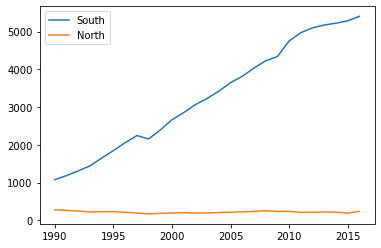

In [41]:
tdf_ns = df_ns.T
print(tdf_ns.head())
print(tdf_ns.plot())

막대 그래프
- kind = "bar"

AxesSubplot(0.125,0.125;0.775x0.755)


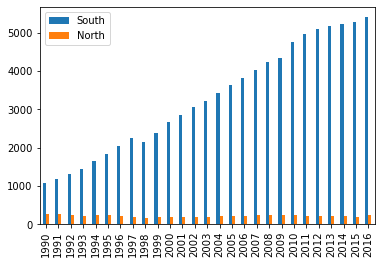

In [42]:
print(tdf_ns.plot(kind = "bar"))

히스토그램
- 빈도와 관련
- kind = "hist"

AxesSubplot(0.125,0.125;0.775x0.755)


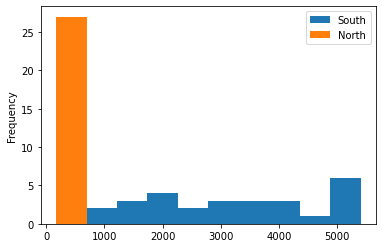

In [43]:
print(tdf_ns.plot(kind = "hist"))

산점도
- 자동차 연비 데이터 셋 사용
- x 축과 y 지정
- kind = "scatter"
- plot(x = 열이름, y = 열이름, 옵션)
 - x 축 : 무게(weight)
 - y 축 : 연비(mpg)

In [50]:
import pandas as pd

df = pd.read_csv('./auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

AxesSubplot(0.125,0.125;0.775x0.755)


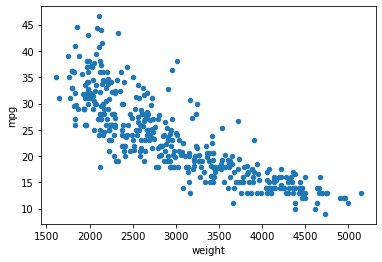

In [51]:
print(df.plot(x = "weight", y = "mpg", kind = "scatter"))

박스 플롯
- 특정 변수의 데이터 분포와 분산 정도를 확인
- kind = "box"
- 연비와 실린더 수를 이용
- IQR(사분위수 범위)
 - Q3(75%) - Q1(25%)
- 박스 플롯에서 벗어난 값
 - Minimum : Q1 - 1.5 * IQR
 - Maximum : Q3 + 1.5 * IQR

AxesSubplot(0.125,0.125;0.775x0.755)


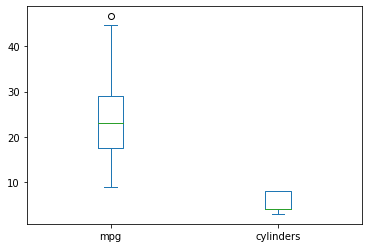

In [52]:
print(df[['mpg', 'cylinders']].plot(kind = "box"))

matplotlib
- 기본 그래프 도구
- 다양한 종류의 데이터 분석 가능
- 그래프 요소를 세세하게 꾸미기 가능

선 그래프
- 연속하는 데이터 값들을 직선 or 곡선으로 연결한 그래프
- 데이터 값 사이의 관계를 표현

선 그래프

pandas 모듈 불러오기(pd)<br>
matplotlib.pyplot 모듈 불러오기(plt)<br>
df 객체 생성
- 시도별 전출입 인구수.xlsx 파일 불러오기

df 출력

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("./시도별 전출입 인구수.xlsx", header = 0)
print(df)

     전출지별     전입지별      1970      1971      1972      1973      1974  \
0    전출지별     전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1      전국       전국   4046536   4210164   3687938   4860418   5297969   
2     NaN    서울특별시   1742813   1671705   1349333   1831858   2050392   
3     NaN    부산광역시    448577    389797    362202    482061    680984   
4     NaN    대구광역시         -         -         -         -         -   
..    ...      ...       ...       ...       ...       ...       ...   
320   NaN     전라북도       139       202       141       210       219   
321   NaN     전라남도       631       965       857       952      1133   
322   NaN     경상북도       374       619       468       576       625   
323   NaN     경상남도       474       479       440       571      1208   
324   NaN  제주특별자치도      9290     12427     12210     16158     19580   

         1975      1976      1977  ...      2008      2009      2010  \
0    이동자수 (명)  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자

서울 -> 다른 지역 이동
1. fillna 함수를 사용하여 NaN을 채워줌(옵션 : method='ffill')
- ffill 은 인덱스 상의 위에 있는 값으로 NaN을 채움
- bfill 은 인덱스 상의 아래에 있는 값으로 NaN을 채움

df 객체에 저장
- 데이터프레임 객체.fillna(옵션)

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("./시도별 전출입 인구수.xlsx", header = 0)

df = df.fillna(method='ffill')
print(df)

        전출지별     전입지별      1970      1971      1972      1973      1974  \
0       전출지별     전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1         전국       전국   4046536   4210164   3687938   4860418   5297969   
2         전국    서울특별시   1742813   1671705   1349333   1831858   2050392   
3         전국    부산광역시    448577    389797    362202    482061    680984   
4         전국    대구광역시         -         -         -         -         -   
..       ...      ...       ...       ...       ...       ...       ...   
320  제주특별자치도     전라북도       139       202       141       210       219   
321  제주특별자치도     전라남도       631       965       857       952      1133   
322  제주특별자치도     경상북도       374       619       468       576       625   
323  제주특별자치도     경상남도       474       479       440       571      1208   
324  제주특별자치도  제주특별자치도      9290     12427     12210     16158     19580   

         1975      1976      1977  ...      2008      2009      2010  \
0    이동자수 (명)  이동자수 (명)  이동

2. 서울에서 다른 지역으로 이동한 데이터만 추출(A열은 서울, B열은 서울 X)

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("./시도별 전출입 인구수.xlsx", header = 0)

df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터 추출
# mask 객체 생성
# (전출지별 열을 선택해서 서울특별시와 같다는 조건식) & (전입지별 열을 선택해서
# 서울특별시와 같지 않다는 조건식)
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

# df_seoul 객체 생성
# df 객체에서 참인 값 가져오기
df_seoul = df[mask]

In [58]:
print(df_seoul)

     전출지별     전입지별     1970     1971     1972     1973     1974     1975  \
19  서울특별시       전국  1448985  1419016  1210559  1647268  1819660  2937093   
21  서울특별시    부산광역시    11568    11130    11768    16307    22220    27515   
22  서울특별시    대구광역시        -        -        -        -        -        -   
23  서울특별시    인천광역시        -        -        -        -        -        -   
24  서울특별시    광주광역시        -        -        -        -        -        -   
25  서울특별시    대전광역시        -        -        -        -        -        -   
26  서울특별시    울산광역시        -        -        -        -        -        -   
27  서울특별시  세종특별자치시        -        -        -        -        -        -   
28  서울특별시      경기도   130149   150313    93333   143234   149045   253705   
29  서울특별시      강원도     9352    12885    13561    16481    15479    27837   
30  서울특별시     충청북도     6700     9457    10853    12617    11786    21073   
31  서울특별시     충청남도    15954    18943    23406    27139    25509    51205   
32  서울특별시   

3. 전출지별 열 제거
- df_seoul 에 저장

4. 전입지별 -> 전입지 열 이름 변경
5. 행 인덱스 지정
- 전입지

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("./시도별 전출입 인구수.xlsx", header = 0)

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [60]:
print(df_seoul)

            1970     1971     1972     1973     1974     1975     1976  \
전입지                                                                      
전국       1448985  1419016  1210559  1647268  1819660  2937093  2495620   
부산광역시      11568    11130    11768    16307    22220    27515    23732   
대구광역시          -        -        -        -        -        -        -   
인천광역시          -        -        -        -        -        -        -   
광주광역시          -        -        -        -        -        -        -   
대전광역시          -        -        -        -        -        -        -   
울산광역시          -        -        -        -        -        -        -   
세종특별자치시        -        -        -        -        -        -        -   
경기도       130149   150313    93333   143234   149045   253705   202276   
강원도         9352    12885    13561    16481    15479    27837    25927   
충청북도        6700     9457    10853    12617    11786    21073    18029   
충청남도       15954    18943    23406    

dt_g 객체 생성
- 경기도 행을 선택

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("./시도별 전출입 인구수.xlsx", header = 0)

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

dt_g = df_seoul.loc['경기도']
print(dt_g)

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object


시각화하기
- plot 함수를 이용하여 dt_g를 시각화

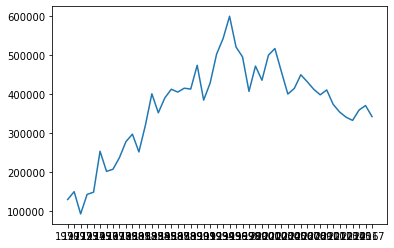

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("./시도별 전출입 인구수.xlsx", header = 0)

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

dt_g = df_seoul.loc['경기도']

print(plt.plot(dt_g))
# plt.plot(x축, y축)
# plt.plot(dt_g.index, dt_g.values)
# plt.show()

차트 제목
- title 함수 사용
 - plt.title(제목으로 사용할 문자열)

축 이름
- x축
 - xlabel 함수 사용
 - plt.xlabel(x축 이름으로 사용할 문자열)
- y축
 - ylabel 함수 사용
 - plt.ylabel(y축 이름으로 사용할 문자열)

C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 mi

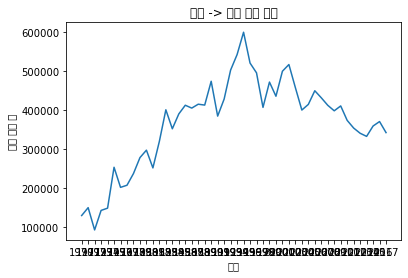

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("./시도별 전출입 인구수.xlsx", header = 0)

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

dt_g = df_seoul.loc['경기도']

plt.plot(dt_g.index, dt_g.values)

# 차트 제목 추가 '서울 -> 경기 인구 이동'
plt.title('서울 -> 경기 이동 인구')

# x축 이름 추가 '기간'
plt.xlabel('기간')

# y축 이름 추가 '이동 인구 수'
plt.ylabel('이동 인구 수')

# 차트 시각화
plt.show()

---
mac 한글 폰트 적용<br>
from matplotlib import rc<br>
rc('font', family = 'AppleGothic')
---

윈도우 한글 폰트 적용

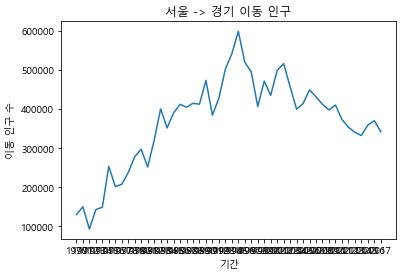

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx", header = 0)

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

dt_g = df_seoul.loc['경기도']

plt.plot(dt_g.index, dt_g.values)

# 차트 제목 추가 '서울 -> 경기 인구 이동'
plt.title('서울 -> 경기 이동 인구')

# x축 이름 추가 '기간'
plt.xlabel('기간')

# y축 이름 추가 '이동 인구 수'
plt.ylabel('이동 인구 수')

# 차트 시각화
plt.show()

눈금 라벨 해결
- 여유 공간이 없기 때문에 발생(겹쳐 보임)

해결 방법 2가지
- figure 함수를 사용하여 그림틀의 가로 사이즈를 더 크게 설정
- xticks 함수를 사용하여 x 축 눈금 라벨을 반시계 방향으로 90도 회전

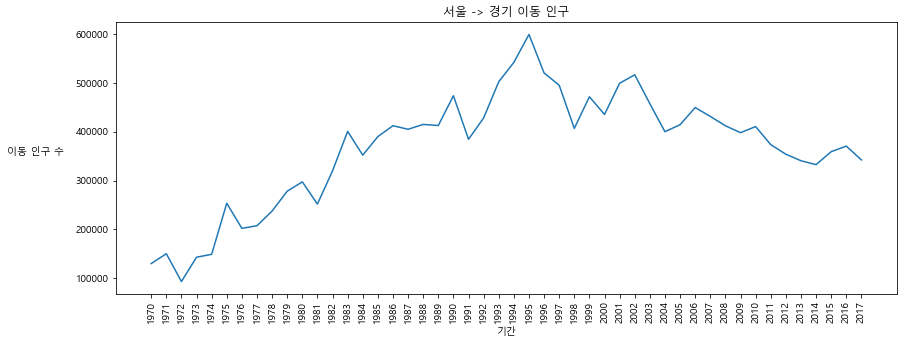

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx", header = 0)

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

dt_g = df_seoul.loc['경기도']

# 그림 사이즈를 지정(가로 14인치, 세로 5인치)
# figure 함수 사용
# figsize 옵션 사용
# figsize=(가로 길이, 세로 길이)
plt.figure(figsize=(14, 5))

# 눈금 라벨 회전(반시계 방향 90도)
# xticks 함수 사용
# rotation 옵션 사용
# rotation=각도
# 각도가 양수이면 반시계 방향, 각도가 음수이면 시계 방향
plt.xticks(rotation='vertical')
# plt.xticks(rotation=90)

plt.plot(dt_g.index, dt_g.values)

plt.title('서울 -> 경기 이동 인구')

plt.xlabel('기간')

plt.ylabel('이동 인구 수')
# y축 이름 회전, 여백 공간 설정
# plt.ylabel('이동 인구 수', rotation = 0, labelpad = 40)

plt.show()

matplotlib에서 기본적으로 제공해주는 스타일 서식
- default, classic, bmh, dark_background, fast, grayscale, ggplot, etc..
- 스타일 설정을 matplotlib 자체적인 설정을 해주는 것이기 때문에 한 번 설정하면 다음 차트에서도 그대로 적용
- 범례 추가
 - 위치 지정 : Best, Upper right, Upper left, Lower left, Lower right, Right, Center left, Center rightm, Lower center, Upper center, center
- 글씨 크기 변경
- 각 값마다 점을 찍기

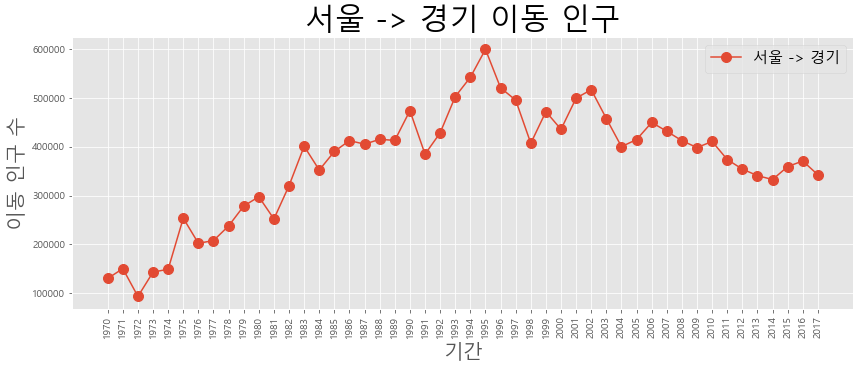

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx", header = 0)

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

dt_g = df_seoul.loc['경기도']

# 스타일 서식 지정(ggplot)
# style.use 함수 사용
# 함수 입력값에 원하는 스타일 서식을 삽입해줌
plt.style.use('ggplot')

plt.figure(figsize=(14, 5))

plt.xticks(rotation='vertical')

# 각 지점마다 점 찍기
# marker 옵션 사용(o)
# markersize 옵션 사용(10)
plt.plot(dt_g.index, dt_g.values, marker = 'o', markersize = 10)

# 글자 크기 변경
# size 옵션 사용(30)
plt.title('서울 -> 경기 이동 인구', size = 30)

# 글자 크기 변경
# size 옵션 사용(20)
plt.xlabel('기간', size = 20)

# 글자 크기 변경
# size 옵션 사용(20)
plt.ylabel('이동 인구 수', size = 20)

# 범례 추가
# legend 함수 사용
# labels 옵션 사용(범례 이름, '서울 -> 경기')
# labels = []
# loc 옵션 사용(위치, best)
# fontsize 옵션 사용(글자 크기, 15)
plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15)

plt.show()

지속적인 스타일 설정 예제

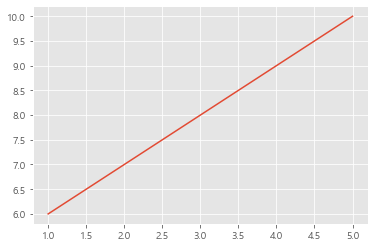

In [77]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]

plt.plot(x, y)

plt.show()

텍스트 처리
- annotate 함수 사용
- 텍스트 내용을 넣을 위치와 정렬 방법을 전달
 - arrowprops 옵션을 사용하면 텍스트 대신에 화살표를 표현
 - 화살표 스타일, 시작점과 끝점의 좌표를 입력
- 범위 증가

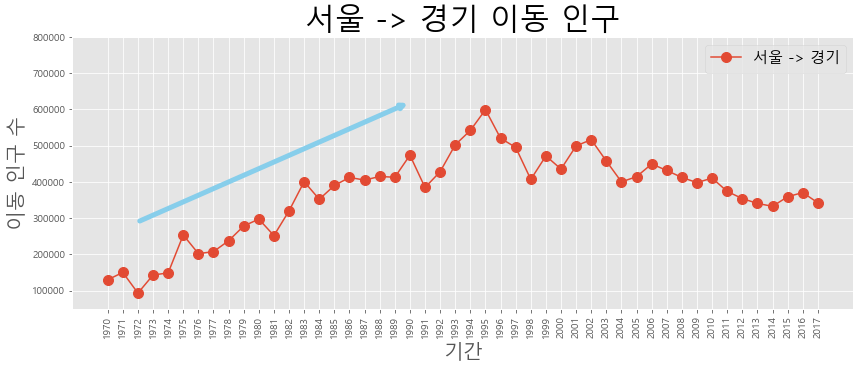

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel("./시도별 전출입 인구수.xlsx", header = 0)

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

dt_g = df_seoul.loc['경기도']

plt.style.use('ggplot')

plt.figure(figsize=(14, 5))

plt.xticks(rotation='vertical')

plt.plot(dt_g.index, dt_g.values, marker = 'o', markersize = 10)

plt.title('서울 -> 경기 이동 인구', size = 30)

plt.xlabel('기간', size = 20)

plt.ylabel('이동 인구 수', size = 20)

plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15)

# y축 범위 지정
# ylim 함수 사용(최소값, 최대값) - 50000 ~ 800000
plt.ylim(50000, 800000)

# 화살표 만들기
# annotate 함수 사용
# 옵션 순서
# - 텍스트 : ''
# - 머리 부분 : xy = (20, 620000)
# - 꼬리 부분 : xytext = (2, 290000)
# - 좌표 체계 : xycoords = data
# - 화살표 특성
plt.annotate('',
             xy = (20, 620000),
             xytext = (2, 290000),
             xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5))

plt.show()